In [1]:
# The dataset comes from the UCI Machine Learning repository, and it is related to direct marketing campaigns 
# (phone calls) of a Portuguese banking institution.
# Here are the libraries we will use:

import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
# The dataset provides the bank customers’ information. It includes 41,188 records and 21 fields.
data = pd.read_csv('datasets/banking.csv', header=0)

# Here drop the NAs
data = data.dropna()

print(data.shape)
print(list(data.columns))

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


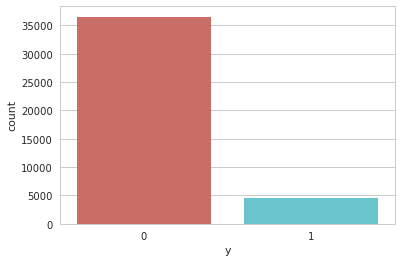

In [3]:
# Here we plot the number of response types (0 means they did not open an account, 1 means they did)

sns.countplot(x='y',data=data, palette='hls')
plt.show()

In [4]:
# Pandas provides a helpful tool for checking for missing values ...

data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

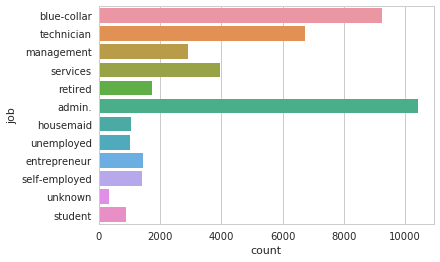

In [5]:
# Looks good. Here we have a plot for the 'job' attribute, which is categorical:

sns.countplot(y="job", data=data)
plt.show()

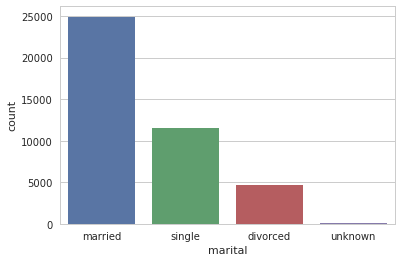

In [6]:
# We can easily create plots for other variables ...

sns.countplot(x="marital", data=data)
plt.show()

In [7]:
# We will create a model with a subset of the predictors. There are two ways to do this: We can 
# create a new dataset by selecting columns from our current dataset, or we can drop columns
# in our current dataset.

# This command removes the unwanted columns. The 'axis=1' paramter says to use column indices (from
# preceding list), inplace=True says modify the dataset in place and return none.

data.drop(data.columns[[0, 3, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19]], axis=1, inplace=True)

In [10]:
# Our data set has categorical data - we need to create dummy variables. We can do this as follows:

data2 = pd.get_dummies(data, columns =['job', 'marital', 'default', 'housing', 'loan', 'poutcome'])
data2.columns

Index(['y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success'],
      dtype='object')

In [11]:
# Some of the values for some of these attributes are listed as 'unknown' - we should remove the dummy variables 
# for those. 

data2.drop(data2.columns[[12, 16, 18, 21, 24]], axis=1, inplace=True)
data2.columns

Index(['y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single', 'default_no',
       'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [12]:
# Now we can split the dataset for CV

X = data2.iloc[:,1:]
y = data2.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [13]:
X_train.shape

(30891, 23)

In [14]:
X_test.shape

(10297, 23)

In [13]:
# Now we build a Logistic Regression model

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
# Let's see how it did

y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[9046  110]
 [ 912  229]]


In [15]:
# Here is accuracy ...
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


In [16]:
# we can also use functions to calculate precision, recall, and F-measure

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.91      0.99      0.95      9156
          1       0.68      0.20      0.31      1141

avg / total       0.88      0.90      0.88     10297

